In [1]:
import pandas as pd
import numpy as np

df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)

df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',
                   'Proline']

print('class label', np.unique(df_wine['Class label']))

class label [1 2 3]


In [0]:
from sklearn.model_selection import train_test_split
# y = Class label , X = other data
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

In [0]:
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

In [0]:
from sklearn.base import clone
from itertools import combinations
import numpy as np

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

class SBS():
  def __init__(self, estimator, k_features, scoring=accuracy_score, test_size = 0.25, random_state=1):
    self.scoring = scoring
    self.estimator = estimator
    self.k_features = k_features
    self.test_size = float(test_size)
    self.random_state = random_state

  def fit(self, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=self.test_size, random_state=self.random_state)

    dim = X_train.shape[1]
    self.indices_ = tuple(range(dim))
    self.subsets_ = [self.indices_]
    score = self._calc_score(X_train, y_train, X_test, y_test, self.indices_)

    self.scores_ = [score]

    while dim > self.k_features:
      scores = []
      subsets = []

      for p in combinations(self.indices_, r=dim-1):
        score = self._calc_score(X_train, y_train, X_test, y_test, p)
        scores.append(score)
        subsets.append(p)

      # 최고 값의 인덱스
      best = np.argmax(scores)
      self.indices_ = subsets[best]
      self.subsets_.append(self.indices_)
      dim -= 1
      
      self.scores_.append(scores[best])

    self.k_scores_ = self.scores_[-1]

    return self

  def transform(self, X):
    return X[:, self.indices_]

  def _calc_score(self, X_train, y_train, X_test, y_test, indices):
    self.estimator.fit(X_train[:, indices], y_train)
    y_pred = self.estimator.predict(X_test[:, indices])
    score = self.scoring(y_test, y_pred)

    return score



In [5]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

sbs = SBS(knn, k_features=1)
sbs.fit(X_train_std, y_train)

(13,)
[13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
(13,)
[0.967741935483871, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.967741935483871, 0.967741935483871, 0.967741935483871, 1.0, 0.9354838709677419, 0.7741935483870968]


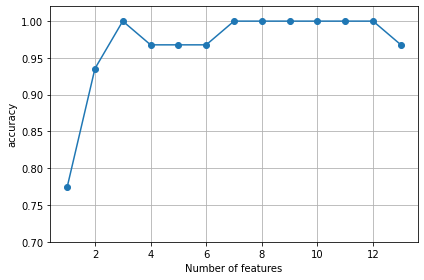

In [6]:
k_feat = [len(k) for k in sbs.subsets_]

print(np.shape(k_feat))
print(k_feat)
print(np.shape(sbs.scores_))
print(sbs.scores_)

plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.7, 1.02])
plt.ylabel('accuracy')
plt.xlabel('Number of features')

plt.grid()
plt.tight_layout()
plt.show()

In [7]:
k3 = list(sbs.subsets_[10])
print(k3)
print(df_wine.columns[1:][k3])

[0, 1, 11]
Index(['Alcohol', 'Malic acid', 'OD280/OD315 of diluted wines'], dtype='object')


In [8]:
knn.fit(X_train_std, y_train)
print(knn.score(X_train_std, y_train))
print(knn.score(X_test_std, y_test))

0.967741935483871
0.9629629629629629


In [9]:
knn.fit(X_train_std[:, k3], y_train)
print(knn.score(X_train_std[:, k3], y_train))
print(knn.score(X_test_std[:, k3], y_test))

0.9516129032258065
0.9259259259259259
